In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dfx = pd.read_csv('./Training Data/Diabetes_XTrain.csv')
dfx.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [3]:
dfx = dfx.drop(columns=['Pregnancies','SkinThickness'])
dfx.head()


,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age
0,168,88,321,38.2,0.787,40
1,110,76,0,27.8,0.237,58
2,147,76,0,39.4,0.257,43
3,100,66,90,32.9,0.867,28
4,129,86,270,35.1,0.231,23


In [4]:
dfy = pd.read_csv('./Training Data/Diabetes_YTrain.csv')

In [5]:
dfy.head()

,Outcome
0,1
1,0
2,1
3,1
4,0


In [6]:
dfy

,Outcome
0,1
1,0
2,1
3,1
4,0
...,...
571,0
572,1
573,0
574,0


In [7]:
X_train = dfx.values
Y_train = dfy.values

In [8]:
print(type(X_train))
print(X_train.shape)

<class 'numpy.ndarray'>
(576, 6)


In [9]:
u = np.mean(X_train,axis=0)
std = np.std(X_train,axis=0)
X_train = (X_train-u)/std

In [10]:
print(X_train)

[[ 1.52528095e+00  9.45995009e-01  2.24414482e+00  7.80366182e-01
   9.07500999e-01  5.93633714e-01]
 [-3.16834081e-01  3.53934388e-01 -6.98144441e-01 -4.99183163e-01
  -7.26399991e-01  2.11034006e+00]
 [ 8.58308268e-01  3.53934388e-01 -6.98144441e-01  9.28006491e-01
  -6.66985409e-01  8.46418104e-01]
 ...
 [ 6.42931672e-02 -4.35479774e-01  2.73452637e-01 -2.53115981e-01
   6.99549964e-01 -9.23072630e-01]
 [ 1.08063250e+00  1.56580847e-01  4.56772840e-01 -6.85655949e-02
  -4.26356354e-01  3.40849323e-01]
 [-1.01556737e+00  4.52611158e-01 -1.52766836e-03  1.75579187e-02
  -3.46146670e-01 -3.33242385e-01]]


In [11]:
print(Y_train.reshape(-1,))

[1 0 1 1 0 1 0 0 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 0 1 0 1 1 1 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1
 1 1 0 0 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1
 1 0 1 1 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 0 1 0 0 0 0 0 1 1 1
 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 1 0 0 1 1 0 0 1 0
 0 0 1 0 0 1 0 1 1 0 1 0 1 1 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 1 0 1 1 0 0 0 0
 0 1 0 0 0 0 1 0 1 0 1 0 1 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 0 0
 0 0 0 0 0 1 0 0 1 1 1 1 0 1 0 0 0 1 1 1 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0
 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 1 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 1 1 1 0 1 1 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0
 1 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1
 0 1 1 0 0 0 0 0 1 1 0 0 

In [12]:
print(X_train.shape)

(576, 6)


In [13]:
def get_dist(x,y):
    return np.sqrt(sum((x-y)**2))

In [14]:
# Now we can write our k_nn function
def k_nn(X,Y,query,k=15):
    
    dist = []
    n = X_train.shape[0]
    for i in range(n):
        dist.append((get_dist(X[i],query),Y[i]))
    
    dist = sorted(dist)
    dist = dist[:k]
    
    dist = np.array(dist)
    dist = dist[:,1]
    
    dist = np.unique(dist,return_counts=True)
    
    index = dist[1].argmax()
#     print(index)
    return int(dist[0][index])

In [15]:
k_nn(X_train,Y_train,X_train[0])

1

In [16]:
match = 0
for i in range(X_train.shape[0]):
    if k_nn(X_train,Y_train,X_train[i])==Y_train[i]:
        match+=1

print(match/X_train.shape[0])

0.7934027777777778


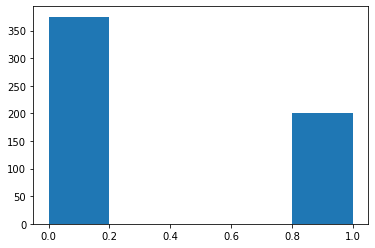

In [17]:
plt.hist(Y_train,5)
plt.show()

In [18]:
sample_df = pd.read_csv('sample_submission.csv')

In [19]:
sample_df

,Outcome
0,1
1,1
2,1
3,1
4,1
...,...
187,1
188,1
189,1
190,1


In [20]:
predictions = []

dfx = pd.read_csv('Diabetes_Xtest.csv')
dfx = dfx.drop(columns=['Pregnancies','SkinThickness'])
X_test = dfx.values

X_test = (X_test-u)/std

In [21]:
for i in range(X_test.shape[0]):
    predictions.append(k_nn(X_train,Y_train,X_test[i]))
    
df = pd.DataFrame(predictions,columns=['Outcome'])

In [22]:
df.to_csv('answers.csv',index=False)

In [23]:
answer_df = pd.read_csv('answers.csv')

In [24]:
answer_df

,Outcome
0,1
1,0
2,0
3,0
4,0
...,...
187,1
188,0
189,1
190,0
